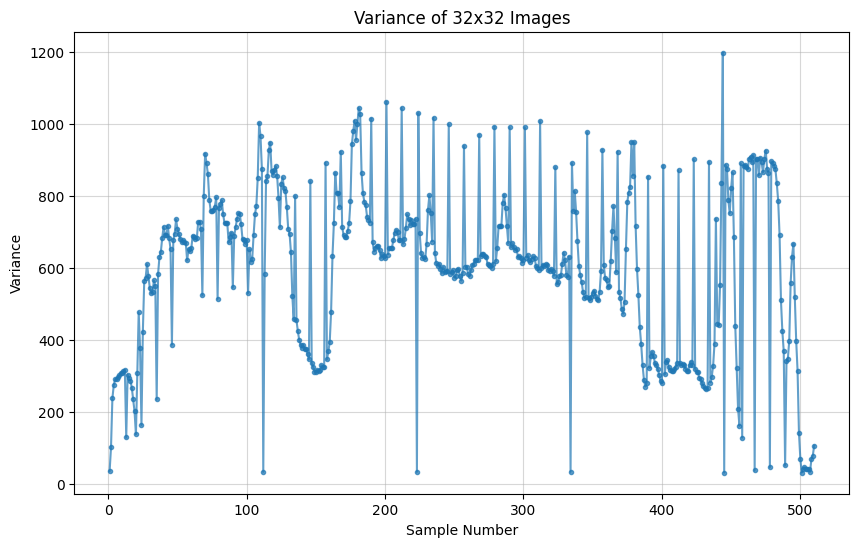

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Path to the folder containing 32x32 images
folder_path = 'images_32x32'  # Replace with the actual folder path

# List to store variance values
variances = []

# Load each image from the folder and compute variance
for filename in sorted(os.listdir(folder_path)):
    if filename.endswith(('.png')):  # Ensure valid image formats
        image_path = os.path.join(folder_path, filename)
        image = Image.open(image_path).convert('L')  # Convert to grayscale
        image_array = np.array(image)  # Convert to NumPy array
        variances.append(np.var(image_array))  # Compute variance

# Plot the variances
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(variances) + 1), variances, marker='o', linestyle='-', markersize=3, alpha=0.7)
plt.title("Variance of 32x32 Images")
plt.xlabel("Sample Number")
plt.ylabel("Variance")
plt.grid(alpha=0.5)
plt.show()


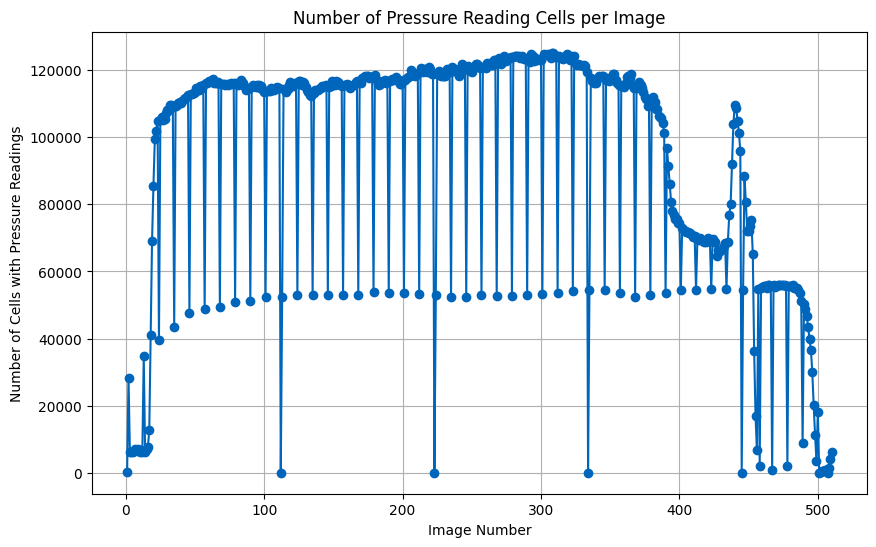

In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Directory containing the 32x32 images
input_folder = "images_32x32"

# Initialize a list to store the number of cells with pressure readings
pressure_cell_counts = []

# Get the list of image files in the folder
image_files = sorted([f for f in os.listdir(input_folder) if f.endswith('.png')])

# Loop through each image file
for i, image_file in enumerate(image_files):
    # Load the image and convert it to a numpy array
    image_path = os.path.join(input_folder, image_file)
    image = Image.open(image_path).convert('L')  # Convert to grayscale
    grid_data = np.array(image)

    # Find the base value (corner value in the top-left corner)
    base_value = grid_data[0, 0]

    # Count the number of cells that have a value other than the base value
    non_base_cells = np.sum(grid_data != base_value)

    # Append the count to the list
    pressure_cell_counts.append(non_base_cells)

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(image_files) + 1), pressure_cell_counts, marker='o', linestyle='-', color='#06b')
plt.title("Number of Pressure Reading Cells per Image")
plt.xlabel("Image Number")
plt.ylabel("Number of Cells with Pressure Readings")
plt.grid(True)
plt.show()


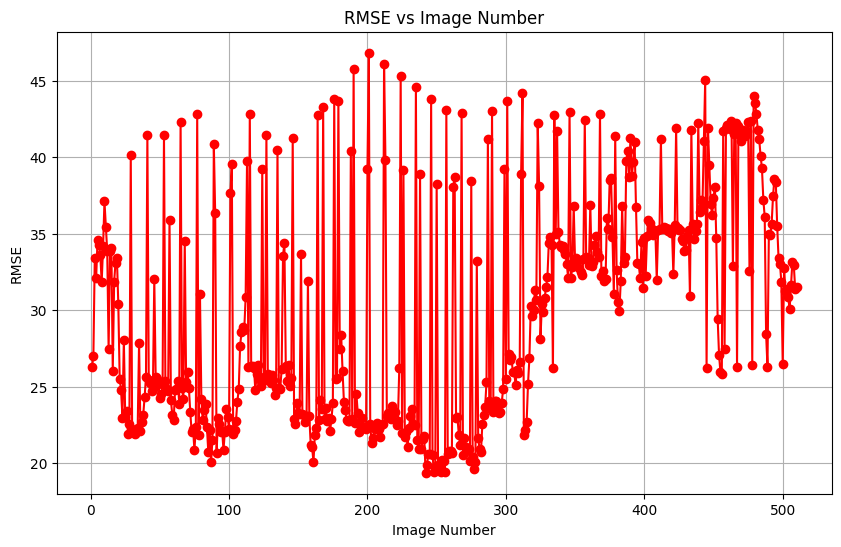

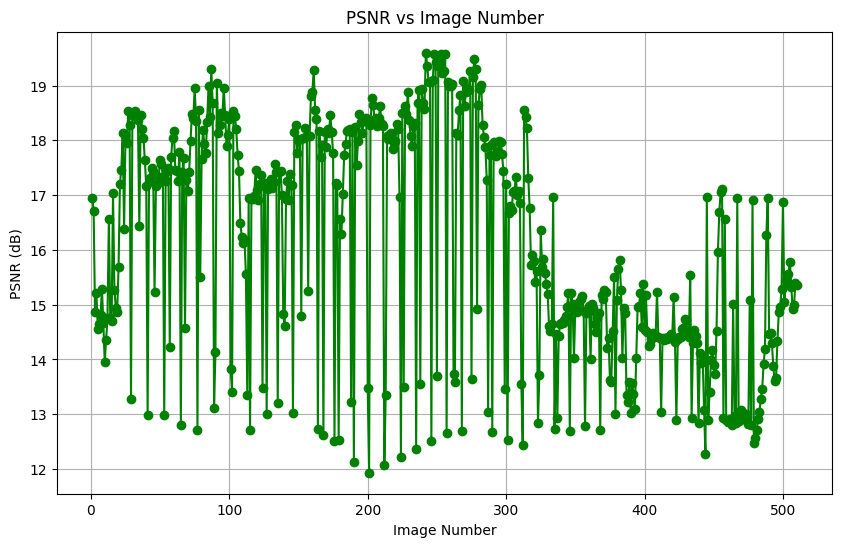

In [15]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from skimage.metrics import peak_signal_noise_ratio as psnr, mean_squared_error as mse

# Directories containing the original and generated images
original_folder = "images_32x32"
generated_folder = "generated_7"

# Initialize lists to store RMSE, PSNR, and pressure cell counts
rmse_values = []
psnr_values = []

# Get the list of image files in both folders
original_files = sorted([f for f in os.listdir(original_folder) if f.endswith('.png')])
generated_files = sorted([f for f in os.listdir(generated_folder) if f.endswith('.png')])

# Ensure both folders have the same number of files
assert len(original_files) == len(generated_files), "Mismatch in the number of images between the original and generated folders."

# Loop through each pair of original and generated images
for i, (orig_file, gen_file) in enumerate(zip(original_files, generated_files)):
    # Load the original and generated images and convert them to numpy arrays
    orig_path = os.path.join(original_folder, orig_file)
    gen_path = os.path.join(generated_folder, gen_file)
    
    orig_image = Image.open(orig_path).convert('L')
    gen_image = Image.open(gen_path).convert('L')
    
    orig_data = np.array(orig_image)
    gen_data = np.array(gen_image)

    # Check if dimensions match, resize the generated image if necessary
    if orig_data.shape != gen_data.shape:
        gen_image = gen_image.resize(orig_data.shape[::-1])  # Resize to match original
        gen_data = np.array(gen_image)

    # Calculate RMSE and PSNR between the original and generated images
    rmse = np.sqrt(mse(orig_data, gen_data))
    rmse_values.append(rmse)

    psnr_value = psnr(orig_data, gen_data, data_range=orig_data.max() - orig_data.min())
    psnr_values.append(psnr_value)

# Plot RMSE vs Image Number
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(original_files) + 1), rmse_values, marker='o', linestyle='-', color='r')
plt.title("RMSE vs Image Number")
plt.xlabel("Image Number")
plt.ylabel("RMSE")
plt.grid(True)
plt.show()

# Plot PSNR vs Image Number
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(original_files) + 1), psnr_values, marker='o', linestyle='-', color='g')
plt.title("PSNR vs Image Number")
plt.xlabel("Image Number")
plt.ylabel("PSNR (dB)")
plt.grid(True)
plt.show()
